In [1]:
import os

from whakaari.utils import load_dataframe
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np
# import seaborn as sns
# sns.set_style("whitegrid")

D:\Projects\miniconda3\envs\whakaari\lib\site-packages\obspy\signal\headers.py:93: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ], align=True)


In [2]:
threshold = 0.7

In [3]:
eruptions = [
    "2025-03-20",
    "2025-04-22",
    "2025-05-18",
    "2025-06-17",
    "2025-07-07",
    "2025-08-01",
    "2025-08-17",
]

In [4]:
models = [
    {
        "classifier": "RF",
        "trained_model": [1],
        "forecast_eruption": [2, 3, 4],
        "file": r"D:\Projects\whakaari\output_train_1_RF_ER_2_3_4\predictions\fm_2.00_0.75_2.00_dsar-hf-mf-rsam_hires\consensus.pkl",
    },
    {
        "classifier": "RF",
        "trained_model": [1, 2],
        "forecast_eruption": [3, 4],
        "file": r"D:\Projects\whakaari\output_train_1_2_RF_ER_3_4\predictions\fm_2.00_0.75_2.00_dsar-hf-mf-rsam_hires\consensus.pkl",
    },
    {
        "classifier": "RF",
        "trained_model": [1, 2, 3],
        "forecast_eruption": [4],
        "file": r"D:\Projects\whakaari\output_train_1_2_3_RF_ER_4\predictions\fm_2.00_0.75_2.00_dsar-hf-mf-rsam_hires\consensus.pkl",
    },
    {
        "classifier": "RF",
        "trained_model": [1, 2, 3, 4],
        "forecast_eruption": [5],
        "file": r"D:\Projects\whakaari\output_train_1_2_3_4_RF_ER_5\predictions\fm_2.00_0.75_2.00_dsar-hf-mf-rsam_hires\consensus.pkl",
    },
    {
        "classifier": "RF",
        "trained_model": [1, 2, 3, 4, 5],
        "forecast_eruption": [6, 7],
        "file": r"D:\Projects\whakaari\output_train_1_2_3_4_5_RF_ER_6_7\predictions\fm_2.00_0.75_2.00_dsar-hf-mf-rsam_hires\consensus.pkl",
    },
]

In [5]:
figures_dir = os.path.join(os.getcwd(), "figures")
os.makedirs(figures_dir, exist_ok=True)

In [6]:
def compute_confidence_interval(values: np.ndarray):
    # 500 is number of classifiers
    confidence_interval = 1.96 * (np.sqrt(values * (1 - values) / 500))
    return confidence_interval

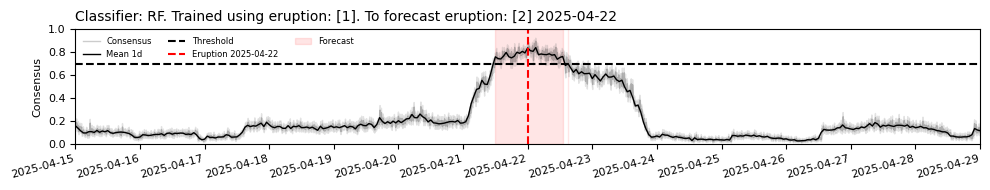

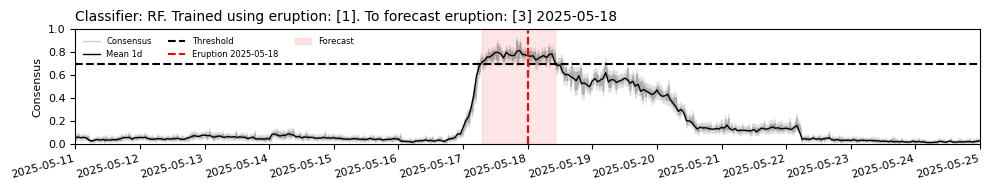

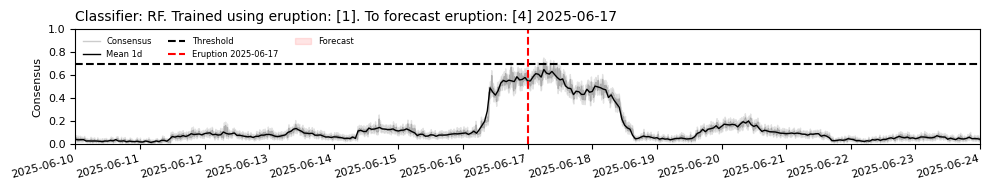

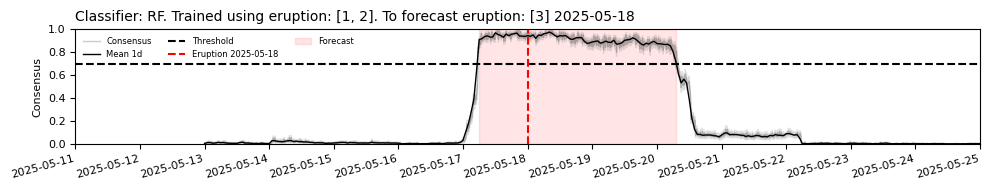

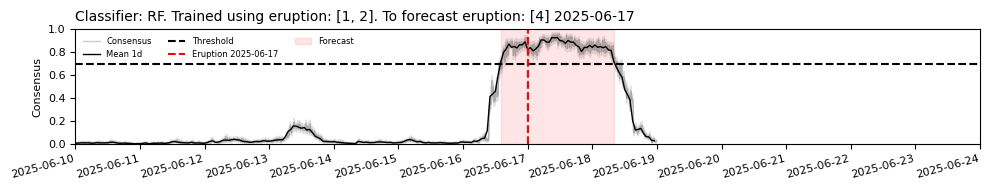

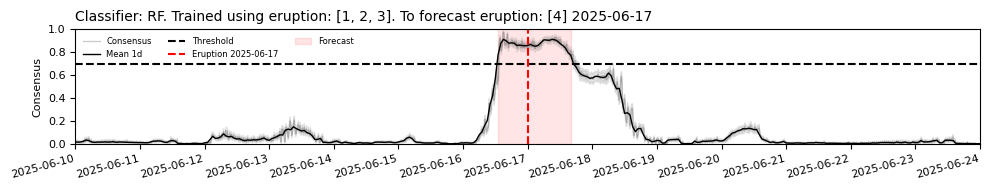

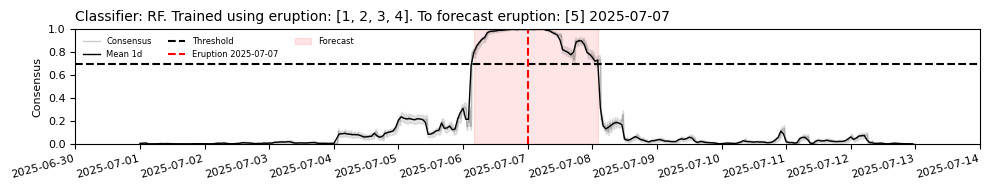

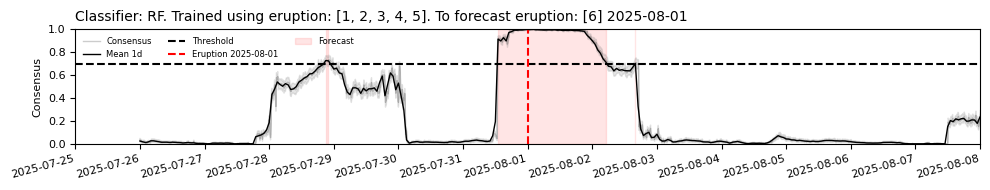

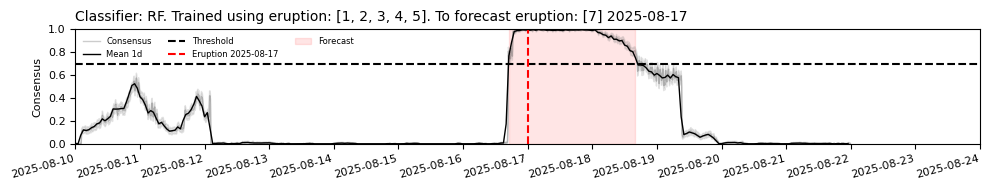

In [9]:
for model in models:
    forecast_eruptions = model["forecast_eruption"]
    df = load_dataframe(model["file"])
    df_more_than_threshold = df[df["consensus"] > threshold]
    times = df_more_than_threshold.index
    times[0] + timedelta(days=1)
    ci = compute_confidence_interval(df["consensus"])
    new_df = df.resample("1h").mean()
    for forecast_eruption in forecast_eruptions:
        date_eruption = datetime.strptime(eruptions[forecast_eruption - 1], "%Y-%m-%d")
        start_date = date_eruption - timedelta(days=7)
        end_date = date_eruption + timedelta(days=7)

        title = f"Classifier: {model['classifier']}. Trained using eruption: {model['trained_model']}. To forecast eruption: [{forecast_eruption}] {date_eruption.strftime('%Y-%m-%d')}"

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 2))
        ax.plot(
            df.index,
            df["consensus"],
            color="black",
            linewidth=1,
            label="Consensus",
            alpha=0.2,
        )
        ax.plot(
            new_df.index, new_df["consensus"], color="k", linewidth=1, label="Mean 1d"
        )

        ax.fill_between(
            df.index,
            (df["consensus"] - ci),
            (df["consensus"] + ci),
            color="gray",
            alpha=0.2,
        )
        ax.fill_between(
            new_df.index,
            0,
            1.0,
            where=(new_df["consensus"] > threshold),
            color="red",
            alpha=0.1,
            label="Forecast",
            zorder=-3,
        )

        ax.set_ylim(0, 1.0)
        ax.set_xlim(start_date, end_date)
        # ax.set_xlim(datetime.strptime("2025-07-31", "%Y-%m-%d"), datetime.strptime("2025-08-04", "%Y-%m-%d") )

        ax.axhline(
            y=threshold, color="k", linestyle="--", linewidth=1.5, label="Threshold"
        )
        ax.set_ylabel("Consensus", fontsize=8)
        ax.tick_params(labelsize=8)
        ax.set_title(title, fontsize=10, loc="left")
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

        ax.axvline(
            date_eruption,
            color="red",
            linestyle="--",
            label=f"Eruption {date_eruption.strftime('%Y-%m-%d')}",
        )
        # ax.grid(False)
        ax.legend(loc="upper left", ncol=3, fontsize=6, frameon=False)
        # ax.legend(loc='upper right', ncol=3, fontsize=8, frameon=False)

        for label in ax.get_xticklabels(which="major"):
            label.set(rotation=15, horizontalalignment="right")

        trained_model = "_".join(map(str, model["trained_model"]))

        plt.tight_layout()
        plt.savefig(
            os.path.join(
                figures_dir,
                f"eruption_{forecast_eruption}_{date_eruption.strftime('%Y-%m-%d')}_{model['classifier']}_train_{trained_model}.png",
            ),
            dpi=300,
        )

In [8]:
"_"

'_'